In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv(
    'compas-scores.csv',
    usecols=[
        'sex',
        'age',
        'race',
        'juv_fel_count', 
        'juv_misd_count',
        'juv_other_count', 
        'priors_count', 
        'days_b_screening_arrest',
        'c_jail_in', 
        'c_jail_out',
        'c_offense_date',
        'c_arrest_date', 
        'c_days_from_compas', 
        'c_charge_degree',
        'c_charge_desc', 
        'is_recid'],
    parse_dates=[
        'c_jail_in', 
        'c_jail_out', 
        'c_offense_date', 
        'c_arrest_date'])
df = df[df['c_days_from_compas'] <= 10]
df['c_days_in_jail'] = (df['c_jail_out'] - df['c_jail_in']).dt.days.fillna(0).astype(int)

In [16]:
df.head()

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,c_days_in_jail
0,Male,69,Other,0,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,2013-08-13,NaT,1.0,F,Aggravated Assault w/Firearm,0,0
2,Male,34,African-American,0,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,2013-01-26,NaT,1.0,F,Felony Battery w/Prior Convict,1,10
3,Male,24,African-American,0,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,2013-04-13,NaT,1.0,F,Possession of Cocaine,1,1
4,Male,23,African-American,0,1,0,1,NaN,NaT,NaT,2013-01-12,NaT,1.0,F,Possession of Cannabis,0,0
6,Male,44,Other,0,0,0,0,0.0,2013-11-30 04:50:18,2013-12-01 12:28:56,2013-11-30,NaT,0.0,M,Battery,0,1


In [17]:
df['c_charge_desc'].value_counts().to_csv('lol.cvs')
df = df.applymap(lambda x: x.lower().strip() if type(x) == str else x)
df['c_charge_desc'].value_counts().to_csv('records_check.csv.csv')

In [18]:
df = pd.get_dummies(df)

In [19]:
#Drop date columns & columns with datatype float
df.drop([
        'c_jail_in', 
        'c_jail_out', 
        'c_offense_date', 
        'c_arrest_date',
'days_b_screening_arrest',
        'c_days_from_compas'],
    axis='columns',
    inplace=True
)

In [20]:
for col in df:
    count = len(df[col]) - df[col].count()
    if count:
        print(col, count)

In [21]:
predicted_variable = 'is_recid'
X = df.loc[:, df.columns != predicted_variable]
y = df.loc[:, df.columns == predicted_variable]
print(X.shape, y.shape)

(8938, 455) (8938, 1)


Split to train and test sets

In [22]:
from sklearn import model_selection
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import sklearn
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
import os
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from pdpbox import pdp, info_plots
from sklearn.metrics import confusion_matrix

import numpy as np
import re

from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

In [23]:
def plot_cmat(ytest, ypred):
    '''
    Plotting confusion matrix
    
    Inputs:
    yte: test label
    ypred: predicted test label
    '''
    skplt.plot_confusion_matrix(ytest,ypred)
    plt.show()


Descision Tree
Accuracy = 0.5995525727069351


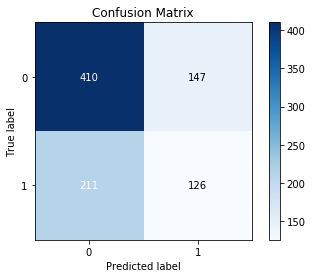

In [24]:
dt = DecisionTreeClassifier(max_features = 'auto')
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
accuracy = metrics.accuracy_score(y_test, dt_pred)
print("Descision Tree")
print("Accuracy =", accuracy)

confusion_matrix(y_test,dt_pred)
plot_cmat(y_test, dt_pred)

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, dt_pred).ravel()
print(fp/(tn+fp+fn+tp),fn/(tn+fp+fn+tp))

0.1644295302013423 0.2360178970917226


Logistic Regression
0.70917225950783


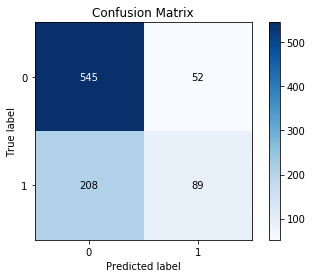

In [13]:
from sklearn import linear_model
lm = linear_model.LogisticRegression()
lm.fit(X_train, y_train.values.ravel())
print("Logistic Regression")
print(lm.score(X_test, y_test))
y_pred = lm.predict(X_test)
plot_cmat(y_test, y_pred)

In [23]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(fp/(tn+fp+fn+tp),fn/(tn+fp+fn+tp))

0.07270693512304251 0.24496644295302014
